In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
x_train['Age_99'] = x_train['Age'].fillna(99)
x_train['Age_minus1'] = x_train['Age'].fillna(-1)

x_train['Fare_999'] = x_train['Fare'].fillna(999)
x_train['Fare_minus1'] = x_train['Fare'].fillna(-1)

In [19]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after 99 wala imputation: ', x_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', x_train['Age_minus1'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', x_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', x_train['Fare_minus1'].var())

Original Age variable variance:  210.21885845269915
Age Variance after 99 wala imputation:  939.127177766518
Age Variance after -1 wala imputation:  315.4279529051897
Original Fare variable variance:  2450.0516098884364
Fare Variance after 999 wala imputation:  46049.27962648418
Fare Variance after -1 wala imputation:  2382.0858299640104


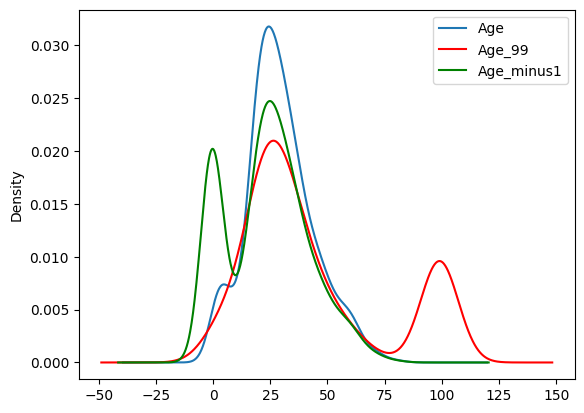

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

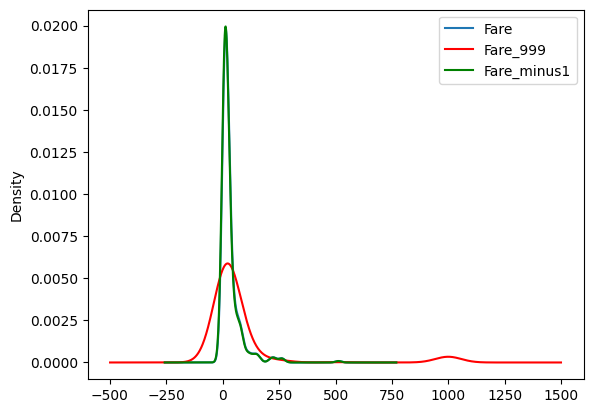

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,210.218858,73.970914,-6.258720,210.218858,210.218858,32.425189,71.462888
Fare,73.970914,2450.051610,17.738584,-49.319123,106.513492,2450.051610,2450.051610
Family,-6.258720,17.738584,2.593212,-6.967740,-4.166060,16.863468,16.865443
Age_99,210.218858,-49.319123,-6.967740,939.127178,-167.921079,-259.863561,-39.501257
Age_minus1,210.218858,106.513492,-4.166060,-167.921079,315.427953,150.803708,99.551417
Fare_999,32.425189,2450.051610,16.863468,-259.863561,150.803708,46049.279626,812.381475
Fare_minus1,71.462888,2450.051610,16.865443,-39.501257,99.551417,812.381475,2382.085830


In [27]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.097054,-0.286993,1.000000,1.000000,0.010104,0.095538
Fare,0.097054,1.000000,0.220414,-0.032375,0.120661,1.000000,1.000000
Family,-0.286993,0.220414,1.000000,-0.141192,-0.145665,0.048800,0.214585
Age_99,1.000000,-0.032375,-0.141192,1.000000,-0.308527,-0.039516,-0.026410
Age_minus1,1.000000,0.120661,-0.145665,-0.308527,1.000000,0.039569,0.114847
Fare_999,0.010104,1.000000,0.048800,-0.039516,0.039569,1.000000,0.077566
Fare_minus1,0.095538,1.000000,0.214585,-0.026410,0.114847,0.077566,1.000000


# Using Sklearn 

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [32]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [34]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [38]:
trf.fit(x_train)

C:\Users\Admin\anaconda3\envs\condaenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [40]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [42]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [44]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [46]:
x_train

array([[ 99.    ,   9.5   ,   0.    ],
       [ 74.    ,   7.775 ,   0.    ],
       [ 38.    , 227.525 ,   0.    ],
       ...,
       [ 99.    ,   7.225 ,   0.    ],
       [  2.    ,  12.2875,   1.    ],
       [ 44.    ,   8.05  ,   0.    ]])